# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'1.3.5'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [4]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [6]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [7]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [8]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [9]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [8]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [9]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [10]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [12]:
harry_potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harry_potter_df.sort_values(by='year',ascending=False).head()

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005


### How many movies were made in the year 2017?

In [13]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [14]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [19]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018) ])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [20]:
len(movies[movies.title == 'Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [23]:
hamlet_df=movies[(movies.title == 'Hamlet') & (movies.year>=2000)]
hamlet_df.sort_values(by='year', ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [32]:
inception_main_cast_number=cast[cast.title=='Inception'].n.isna().sum()
inception_supporting_cast_number

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [33]:
inception_main_cast_number=len(cast[cast.title=='Inception'])-cast[cast.title=='Inception'].n.isna().sum()
inception_main_cast_number

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [40]:
inception_main_cast_df=(cast[cast.title=='Inception'].dropna())
inception_main_cast_df.sort_values(by='n').head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [41]:
albus_dumbledore_movies_df=cast[cast.character.str.contains('Albus Dumbledore', case=False)]
albus_dumbledore_movies_df

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN


In [42]:
albus_dumbledore_actors=albus_dumbledore_movies_df.name.unique()
albus_dumbledore_actors

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Toby Regbo', 'Timothy Tedmanson'],
      dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [48]:
keanu_reeves_role_df=(cast[cast.name.str.contains('Keanu Reeves',case=False)])
len(keanu_reeves_role_df)

62

In [70]:
keanu_reeves_leadin_role_df=keanu_reeves_role_df[(keanu_reeves_role_df.n==1) & (keanu_reeves_role_df.year>=1999)]
keanu_reeves_leadin_role_df

,title,year,name,type,character,n
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892361,John Wick,2014,Keanu Reeves,actor,John Wick,1.0
1892362,John Wick: Chapter 2,2017,Keanu Reeves,actor,John Wick,1.0
1892366,Knock Knock,2015,Keanu Reeves,actor,Evan,1.0
1892378,Siberia,2018,Keanu Reeves,actor,Lucas Hill,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [86]:
actors_number_1950s=cast[(cast.year>=1950) & (cast.year<=1960)]['character'].unique()
actors_number_1950s

array(['Limbo Dance by', 'Hollandse boer', 'Dirk Jan', ...,
       'Dronning Viktoria', 'Frk. Lind', 'moren til Trygve'], dtype=object)

In [ ]:
actors_number_2007_2017=cast[(cast.year>=2007) & (cast.year<=2017)]['character'].unique()
actors_number_2007_2017

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [88]:
leading_roles_since_2000=cast[(cast.n==1) & (cast.year>=2000)]
leading_roles_since_2000

,title,year,name,type,character,n
102,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0
138,All Things Fall Apart,2011,50 Cent,actor,Deon,1.0
144,Freelancers,2012,50 Cent,actor,Malo,1.0
145,Get Rich or Die Tryin',2005,50 Cent,actor,Marcus,1.0
146,Gun,2010,50 Cent,actor,Rich,1.0
...,...,...,...,...,...,...
3785795,120,2008,?zge ?zberk,actress,M?nire,1.0
3785893,6A,2016,Emine ?zkan,actress,Denise,1.0
3785961,Kadife,2012,Ayta? ?ztuna,actress,Kadife Ana,1.0
3786008,Dig og mig,2008,Julie R. ?lgaard,actress,Stephanie,1.0


In [90]:
non_leading_roles_since_2000 = cast[(cast.n!=1) & (cast.year>=2000)].dropna()
non_leading_roles_since_2000

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
11,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
...,...,...,...,...,...,...
3786163,Beowulf & Grendel,2005,Steinunn ?l?na ?orsteinsd?ttir,actress,Wealtheow,15.0
3786164,Eden,2018,Steinunn ?l?na ?orsteinsd?ttir,actress,M??ir Viggu,8.0
3786169,Niceland (Population. 1.000.002),2004,Steinunn ?orvaldsd?ttir,actress,Factory Worker,21.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0


In [100]:
supporting_roles_since_2000=cast[(cast.year>=2000) & (cast.n.isna())]
supporting_roles_since_2000

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
...,...,...,...,...,...,...
3786159,Eldfjall,2011,Katla M. ?orgeirsd?ttir,actress,Home Nurse,NaN
3786160,Svanurinn,2017,Katla M. ?orgeirsd?ttir,actress,?l?f,NaN
3786166,Foreldrar,2007,Lilja Gu?r?n ?orvaldsd?ttir,actress,Katrin Eldri,NaN
3786167,Rokland,2011,Lilja Gu?r?n ?orvaldsd?ttir,actress,A?albj?rg - Dagga's Mother,NaN


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [101]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

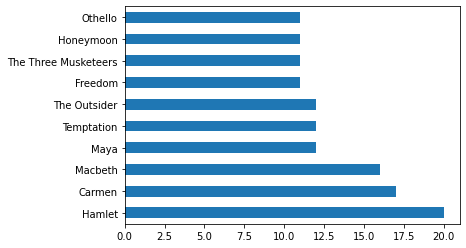

In [102]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [109]:
release_dates.head()
top_3_year=release_dates[release_dates.year>=2000].year.value_counts()[:3]
top_3_year

2016    17548
2014    17519
2015    16639
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:>

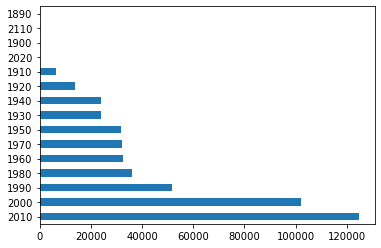

In [132]:
release_dates_new=release_dates
movies_number_per_decade=((release_dates.year//10)*10).value_counts()
movies_number_per_decade.plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [134]:
top_10_character=cast.character.value_counts()[:10]
top_10_character

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [140]:
herself_charater_df=cast[cast.character=='Herself']
top_10_herself_character_people=herself_charater_df.name.value_counts()[:10]
top_10_herself_character_people

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

In [141]:
himself_charater_df=cast[cast.character=='Himself']
top_10_himself_character_people=himself_charater_df.name.value_counts()[:10]
top_10_himself_character_people

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [155]:
zombie_charater_df=(cast[cast.character.str[:6]=='Zombie'])
zombie_charater_df_top_10=zombie_charater_df.character.value_counts()[:10]
zombie_charater_df_top_10

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [156]:
pombie_charater_df=(cast[cast.character.str[:6]=='Police'])
pombie_charater_df_top_10=pombie_charater_df.character.value_counts()[:10]
pombie_charater_df_top_10

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [164]:
keanu_reeves_role_per_year_df=(cast[cast.name.str.contains('Keanu Reeves',case=False)]).year.value_counts()
keanu_reeves_role_per_year_df

2016    5
1988    4
1993    4
2003    3
2017    3
1986    3
2000    3
1999    3
2005    3
1991    3
1996    2
1989    2
1997    2
2001    2
2006    2
1990    2
2008    2
1995    2
2013    2
2018    1
1994    1
2010    1
1985    1
2015    1
2019    1
2014    1
2012    1
1992    1
2009    1
Name: year, dtype: int64

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:>

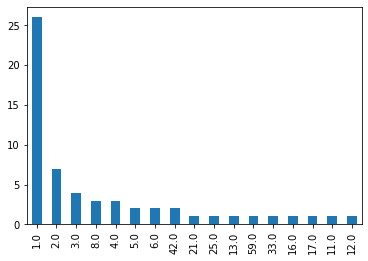

In [171]:
keanu_reeves_cast_position_df=(cast[cast.name.str.contains('Keanu Reeves',case=False)]).n.value_counts()
keanu_reeves_cast_position_df.plot(kind='bar')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:>

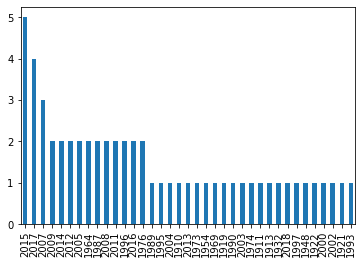

In [173]:
Hamlet_per_year_df=(movies[movies.title.str.contains('Hamlet',case=False)]).year.value_counts()
Hamlet_per_year_df.plot(kind='bar')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [178]:
leading_roles_in_60s=cast[(cast.n==1) & ((((cast.year)//10)*10)==1960)]
len(leading_roles_in_60s)

11823

In [179]:
leading_roles_in_2000s=cast[(cast.n==1) & ((((cast.year)//10)*10)==2000)]
len(leading_roles_in_2000s)

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [76]:
frank_oz_movies_df=cast[cast.name.str.contains('Frank Oz', case=False)]
frank_oz_movies_roll_number=frank_oz_movies_df.groupby(['year'])['title'].value_counts()
frank_oz_movies_roll_number2=frank_oz_movies_roll_number[frank_oz_movies_roll_number>=2]
frank_oz_movies_roll_number2
duplicates = frank_oz_movies_df.duplicated(subset = 'title', keep = False)
frank_oz_movies_df[duplicates].sort_values(by =['year', 'title'])


,title,year,name,type,character,n
1723645,The Muppet Movie,1979,Frank Oz,actor,Miss Piggy,2.0
1723646,The Muppet Movie,1979,Frank Oz,actor,Fozzie Bear,2.0
1723647,The Muppet Movie,1979,Frank Oz,actor,Animal,2.0
1723648,The Muppet Movie,1979,Frank Oz,actor,Sam the Eagle,2.0
1723649,The Muppet Movie,1979,Frank Oz,actor,Doc Hopper's Men,2.0
1723650,The Muppet Movie,1979,Frank Oz,actor,Marvin Suggs,2.0
1723651,The Muppet Movie,1979,Frank Oz,actor,Swedish Chef (assistant),2.0
1723652,The Muppet Movie,1979,Frank Oz,actor,Motorcycle Guy,2.0
1723598,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [77]:
duplicates = frank_oz_movies_df.duplicated(subset = 'character', keep = False)
frank_oz_movies_df[duplicates].sort_values(by =['character','year'])

,title,year,name,type,character,n
1723647,The Muppet Movie,1979,Frank Oz,actor,Animal,2.0
1723634,The Great Muppet Caper,1981,Frank Oz,actor,Animal,2.0
1723655,The Muppets Take Manhattan,1984,Frank Oz,actor,Animal,2.0
1723641,The Muppet Christmas Carol,1992,Frank Oz,actor,Animal,5.0
1723611,Muppet Treasure Island,1996,Frank Oz,actor,Animal,14.0
1723614,Muppets from Space,1999,Frank Oz,actor,Animal,7.0
1723656,The Muppets Take Manhattan,1984,Frank Oz,actor,Bert,2.0
1723602,Follow That Bird,1985,Frank Oz,actor,Bert,3.0
1723625,The Adventures of Elmo in Grouchland,1999,Frank Oz,actor,Bert,16.0
1723657,The Muppets Take Manhattan,1984,Frank Oz,actor,Cookie Monster,2.0


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

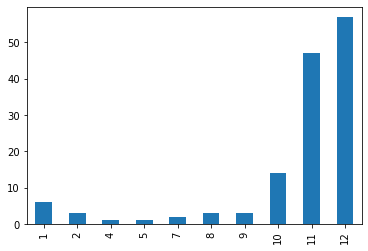

In [230]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

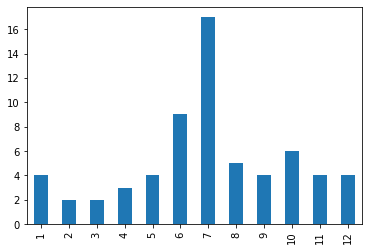

In [237]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

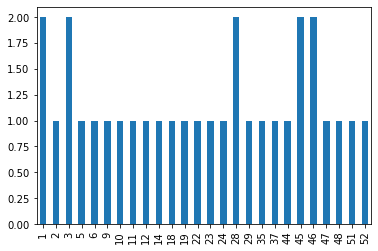

In [10]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [268]:
keanu_reeves_role_df=(cast[cast.name.str.contains('Keanu Reeves',case=False)])
keanu_reeves_leadin_role_df=keanu_reeves_role_df[(keanu_reeves_role_df.n==1)]
#release_dates
keanu_reeves_leadin_role_release_date_df=pd.merge(release_dates,keanu_reeves_leadin_role_df,on=['title','year'],how='inner')
keanu_reeves_leadin_role_release_date_USA_df=keanu_reeves_leadin_role_release_date_df[keanu_reeves_leadin_role_release_date_df.country=='USA'].sort_values(by='date')
keanu_reeves_leadin_role_release_date_USA_df


,title,year,country,date,name,type,character,n
714,The Night Before,1988,USA,1988-04-15,Keanu Reeves,actor,Winston Connelly,1.0
78,Bill & Ted's Excellent Adventure,1989,USA,1989-02-17,Keanu Reeves,actor,Ted,1.0
69,Bill & Ted's Bogus Journey,1991,USA,1991-07-19,Keanu Reeves,actor,Ted,1.0
433,Little Buddha,1993,USA,1994-05-25,Keanu Reeves,actor,Siddhartha,1.0
441,Speed,1994,USA,1994-06-10,Keanu Reeves,actor,Jack Traven,1.0
371,Johnny Mnemonic,1995,USA,1995-05-26,Keanu Reeves,actor,Johnny Mnemonic,1.0
49,A Walk in the Clouds,1995,USA,1995-08-11,Keanu Reeves,actor,Paul Sutton,1.0
91,Chain Reaction,1996,USA,1996-08-02,Keanu Reeves,actor,Eddie Kasalivich,1.0
190,Feeling Minnesota,1996,USA,1996-09-13,Keanu Reeves,actor,Jjaks Clayton,1.0
593,The Devil's Advocate,1997,USA,1997-10-17,Keanu Reeves,actor,Kevin Lomax,1.0


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

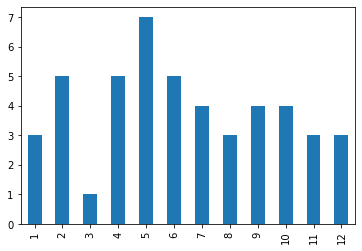

In [278]:
keanu_reeves_role_df=(cast[cast.name.str.contains('Keanu Reeves',case=False)])
keanu_reeves_movies_release_date_df=pd.merge(release_dates,keanu_reeves_role_df,on=['title','year'],how='inner')
keanu_reeves_movies_release_date_USA_df=keanu_reeves_movies_release_date_df[keanu_reeves_movies_release_date_df.country=='USA'].sort_values(by='date')

keanu_reeves_movies_release_date_USA_df.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

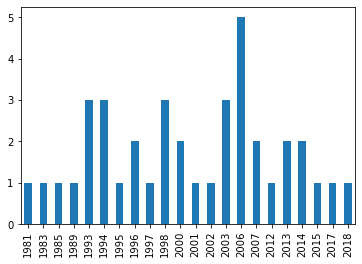

In [279]:
ian_mckellen_role_df=(cast[cast.name.str.contains('Ian McKellen',case=False)])
ian_mckellen_movies_release_date_df=pd.merge(release_dates,ian_mckellen_role_df,on=['title','year'],how='inner')
ian_mckellen_movies_release_date_USA_df=ian_mckellen_movies_release_date_df[ian_mckellen_movies_release_date_df.country=='USA'].sort_values(by='date')

ian_mckellen_movies_release_date_USA_df.date.dt.year.value_counts().sort_index().plot(kind='bar')